# EHealth 705

## Python Tutorial: Sample and Population

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [Sampling methods](#sampling_methods)
2. [Random sampling](#random_sampling)
3. [Central Limit Theorem](#Central_LimitTheorem)
4. [Sampling Experiment](#sampling_experiment)
5. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
6. [Assignment](#Assignment)



#### Date : Feb 8th, 2024


#### Dataset



  - [Diabetes Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
  
  
  
#### Explanation  
  

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


In [1]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#Checking for the missing values in the dataset

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Convert the target column to a categorical variable
df['Outcome']=df['Outcome'].astype('category')

In [45]:
df.describe()[1:].T.style.background_gradient(cmap='Blues').format("{:.2f}")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

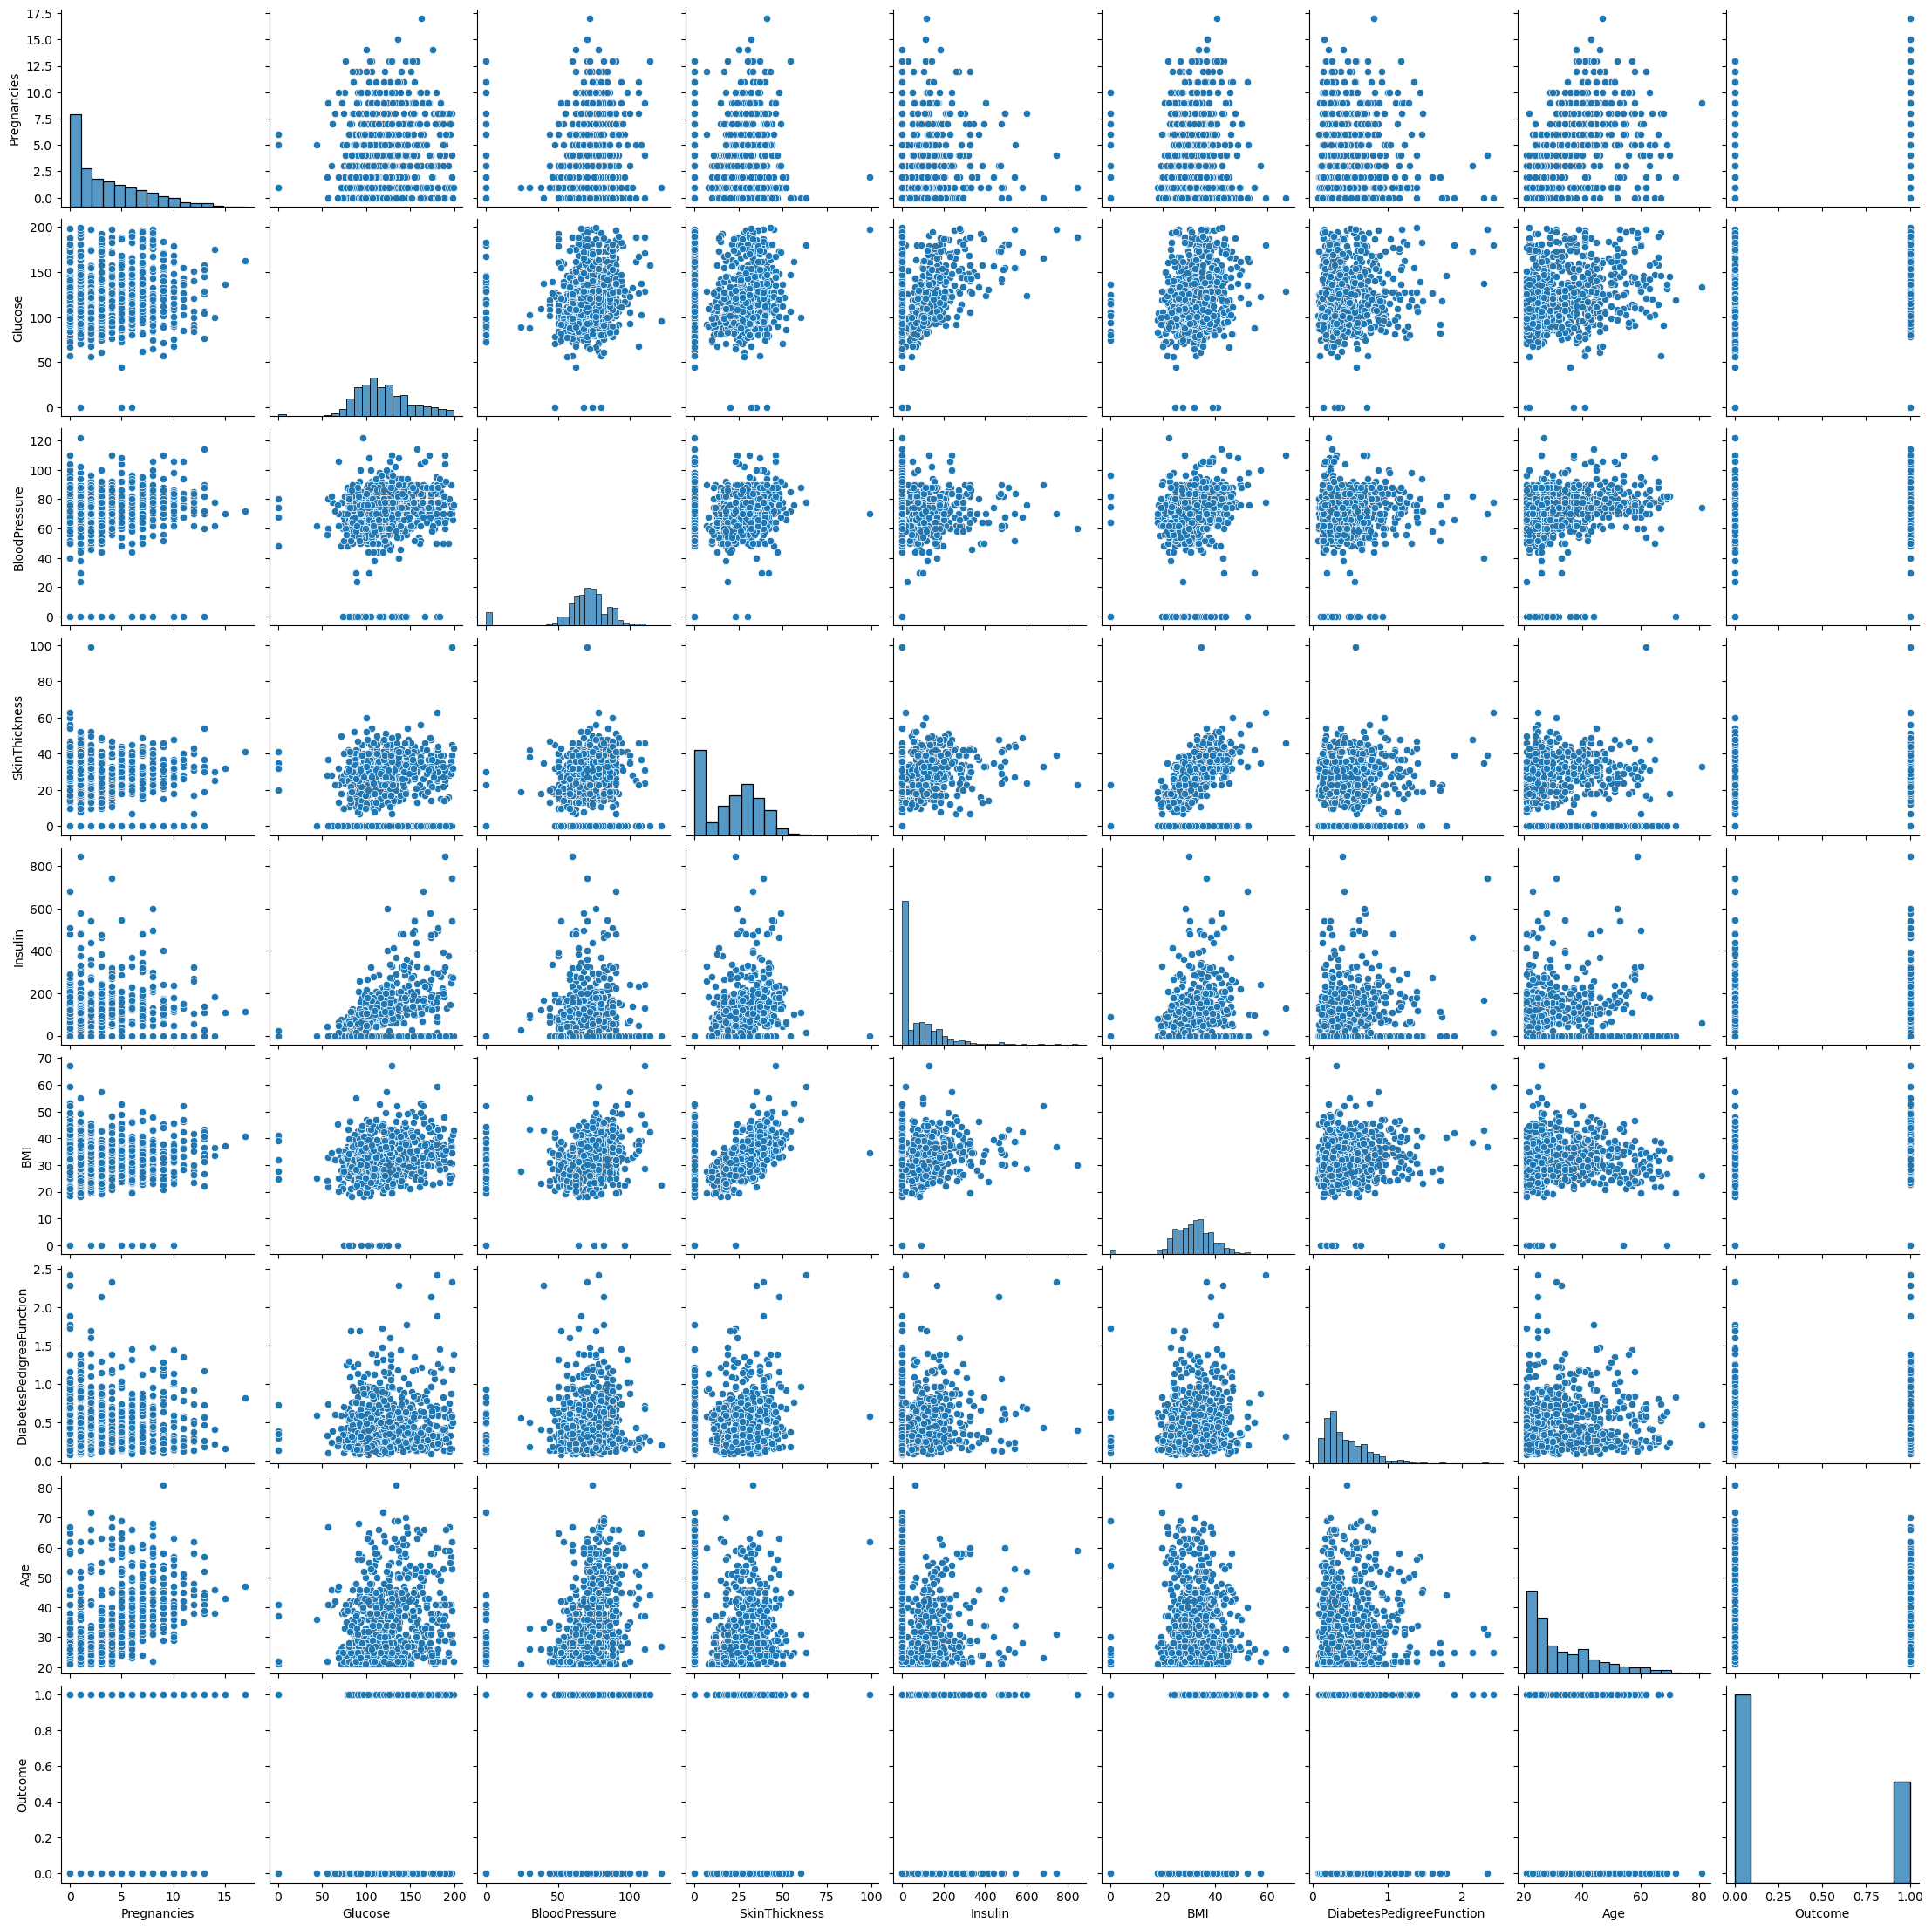

In [6]:
sns.pairplot(df)

## Heatmap
To create a heatmap of the correlation matrix:

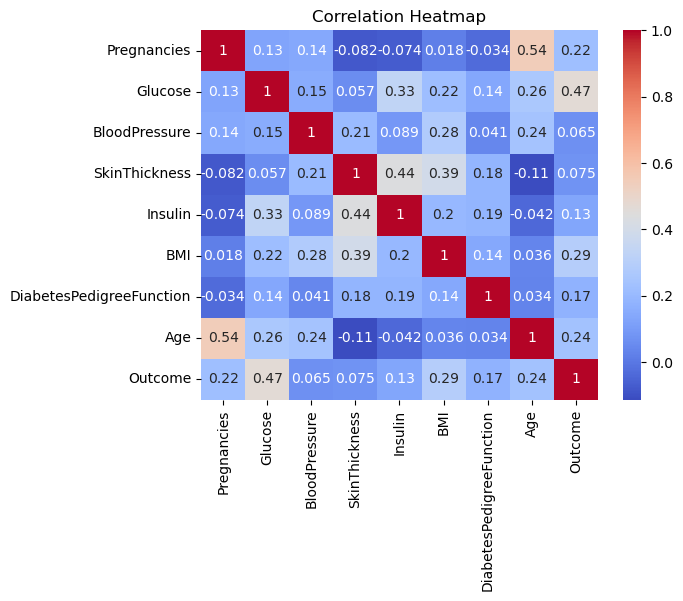

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


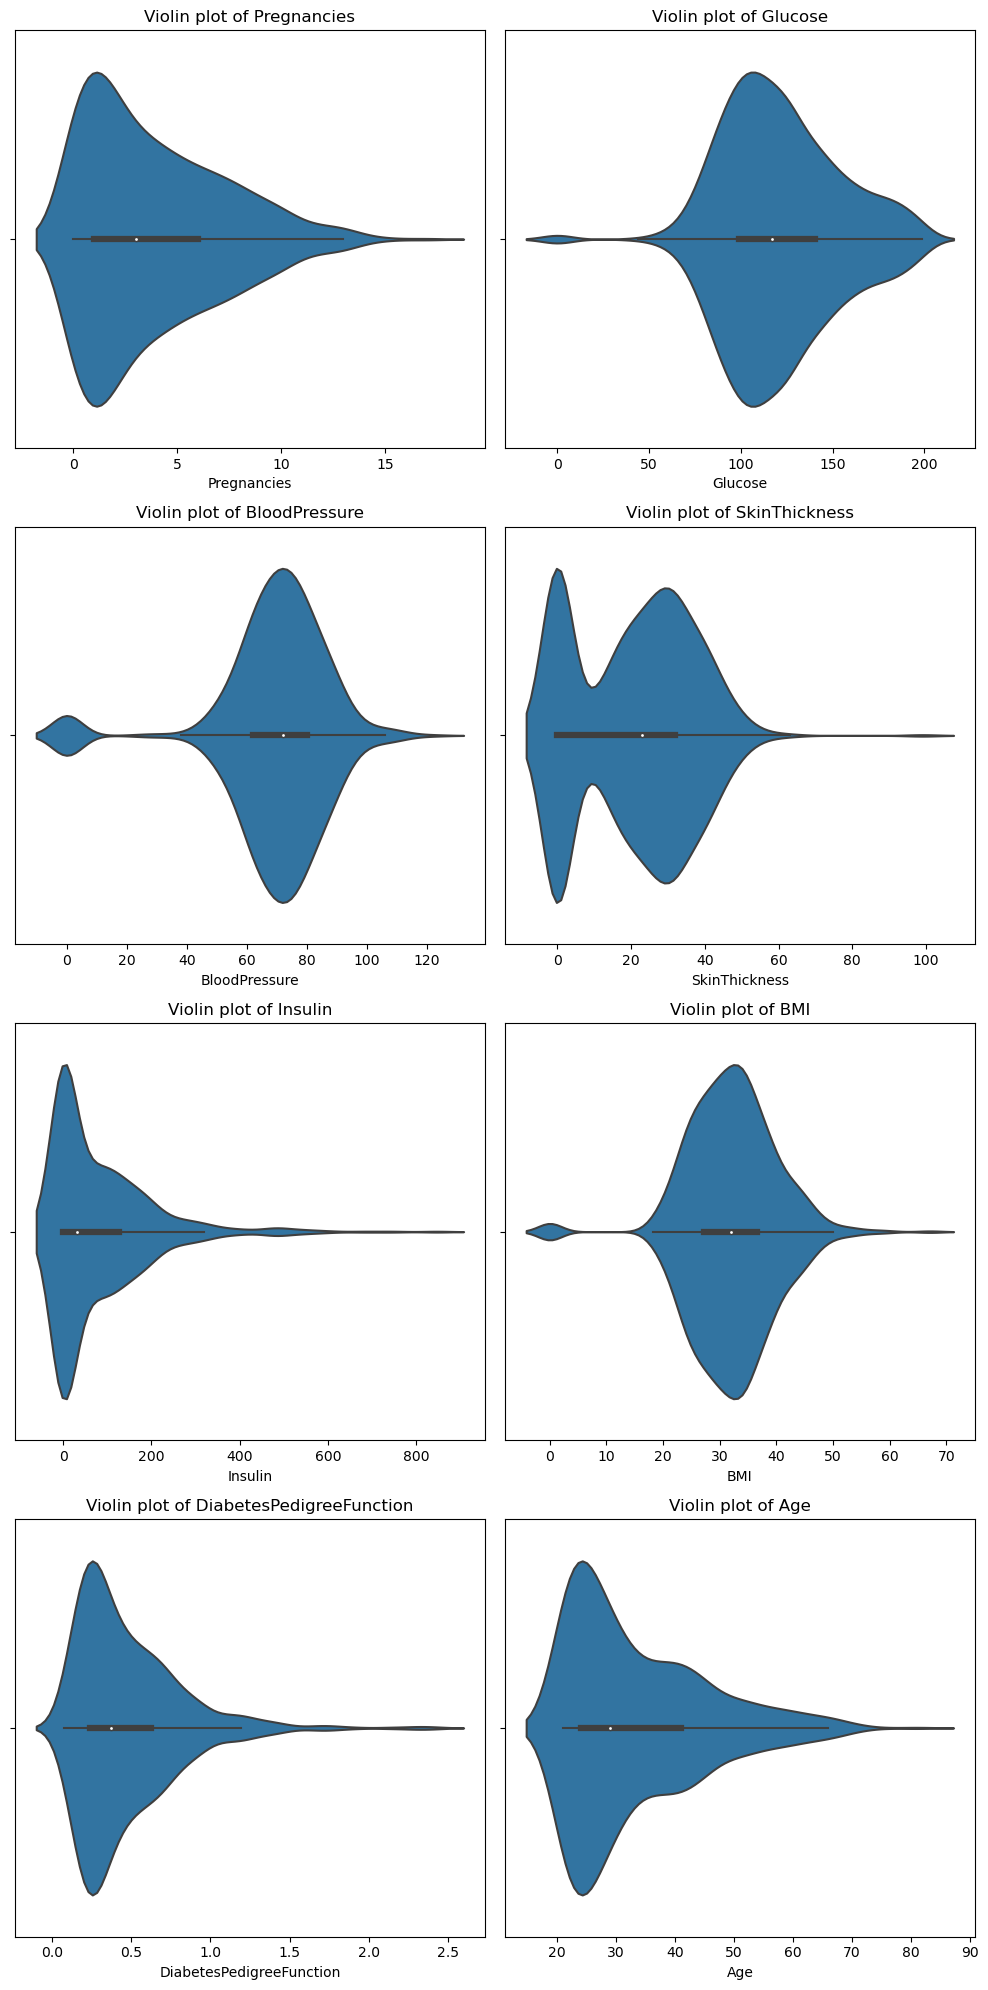

In [8]:
# Univariate Analysis
# Violin plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=df[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

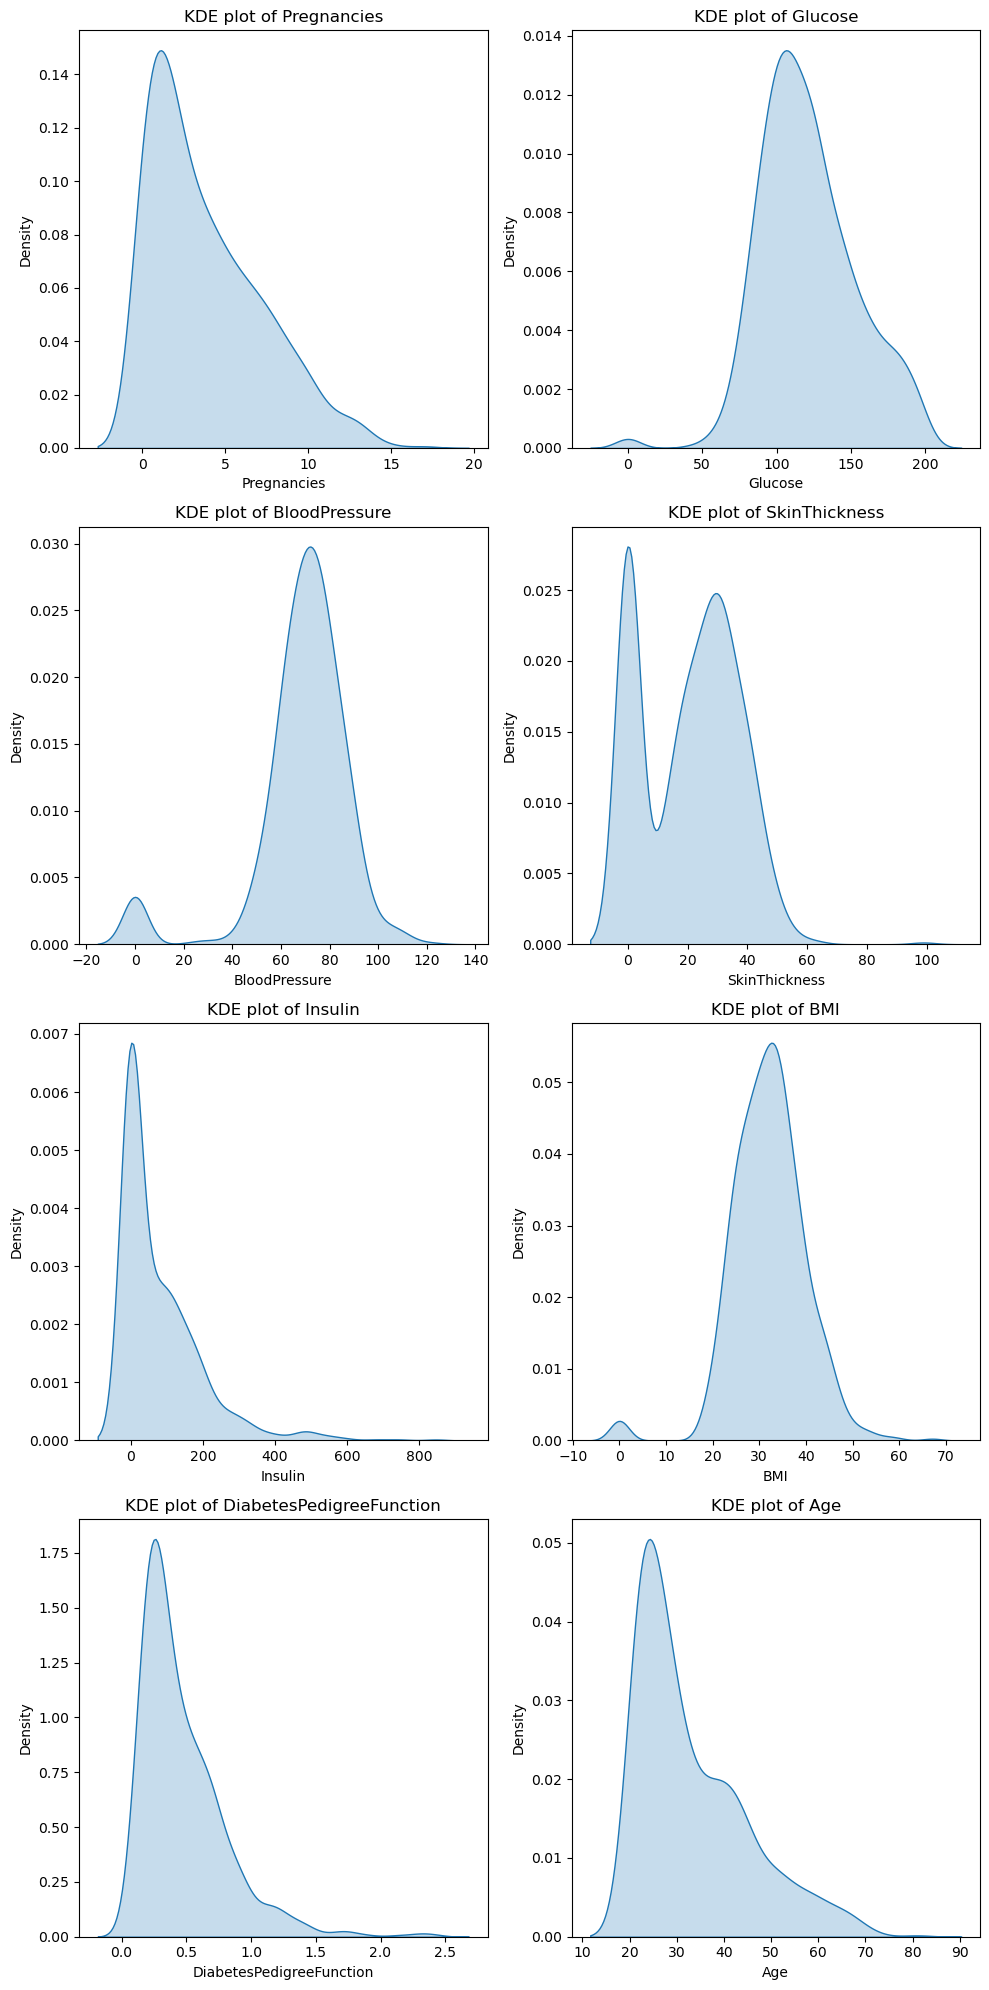

In [9]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

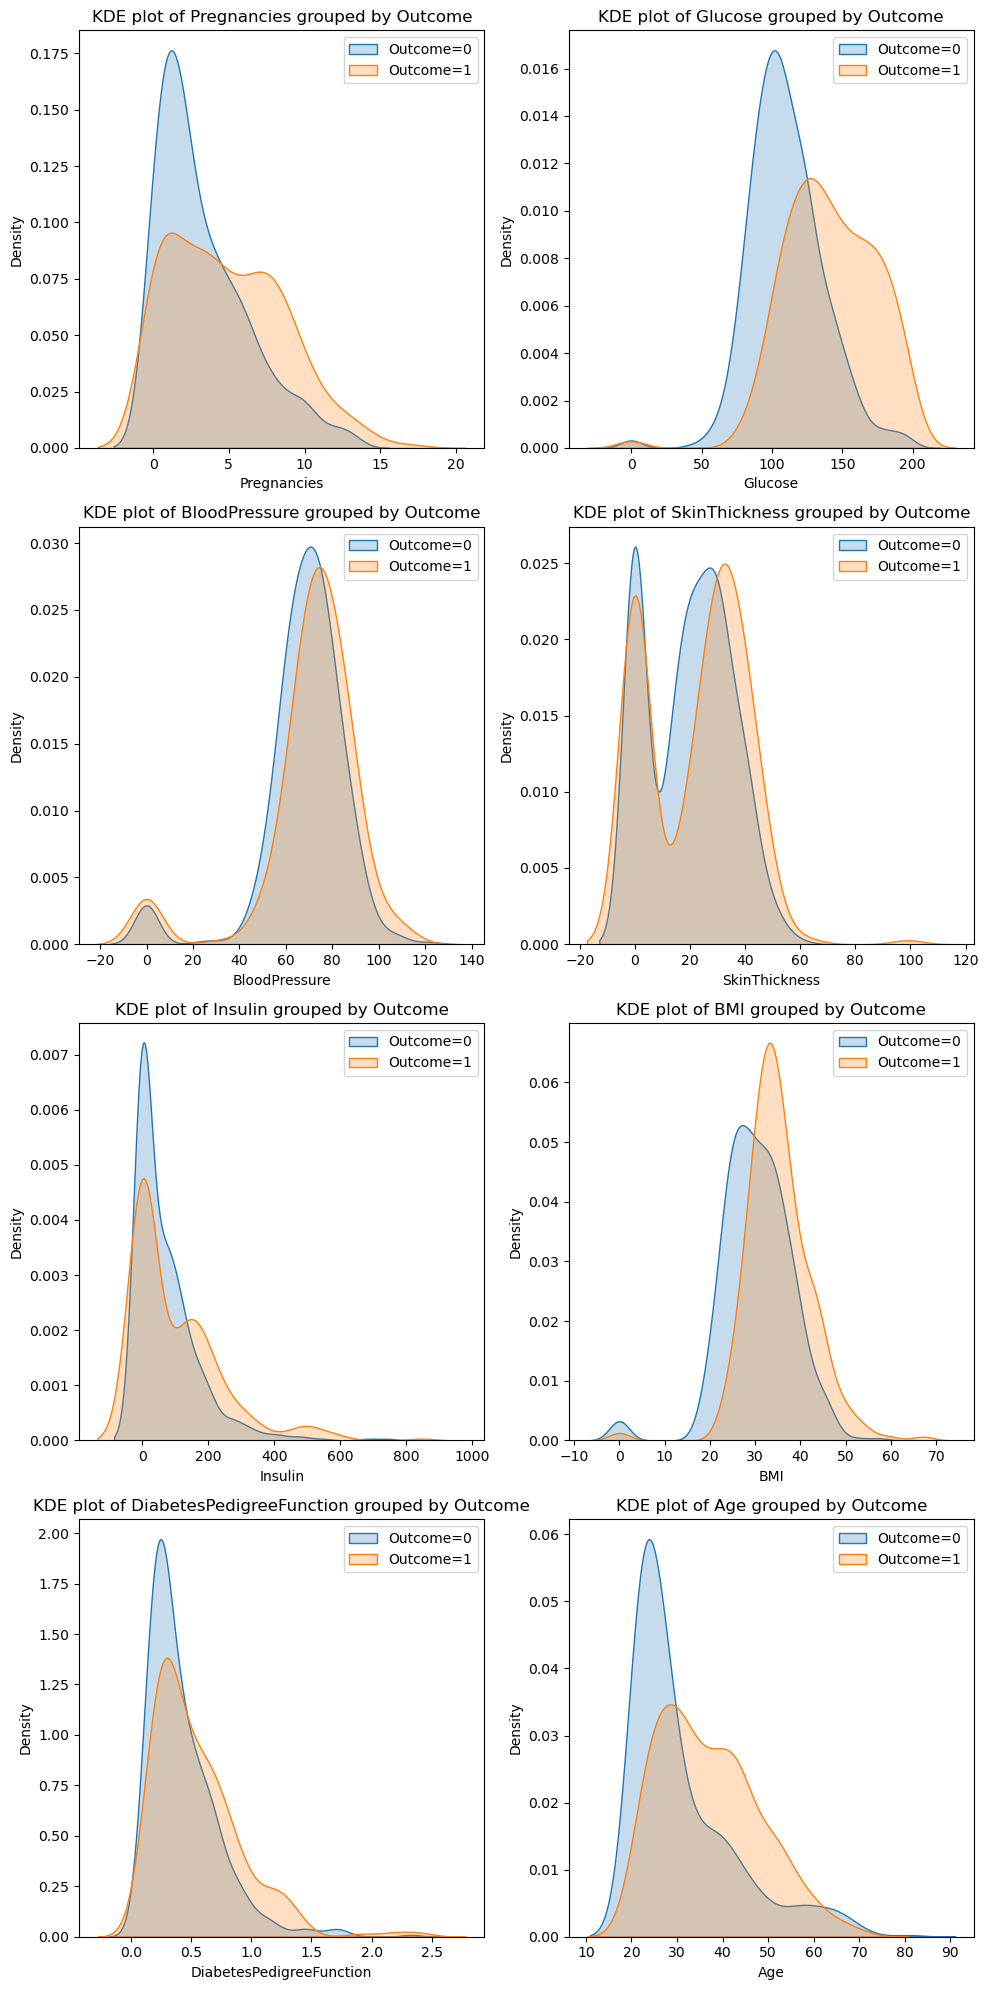

In [11]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=df[df['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

# Sampling methods <a id="sampling_methods"></a>



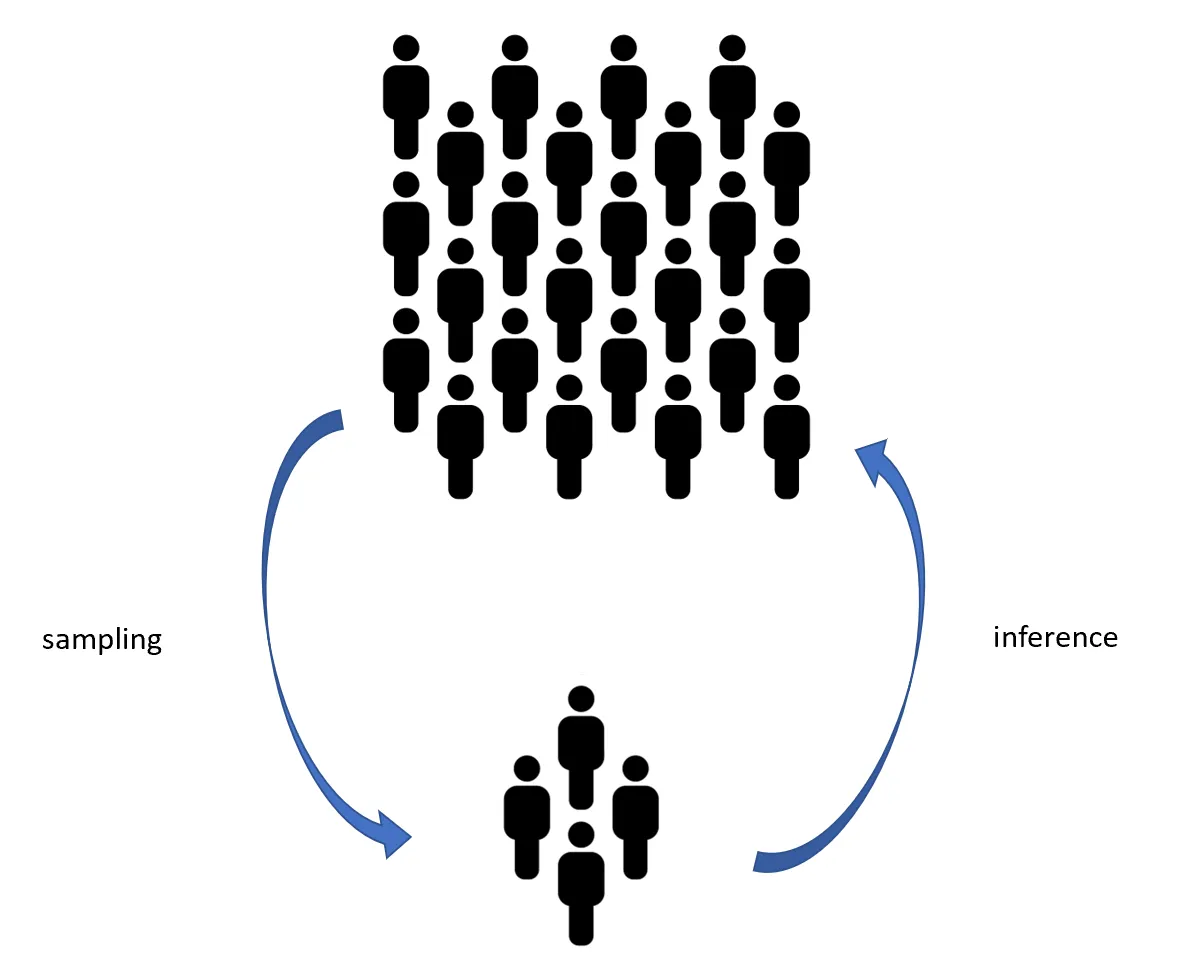

## What is Sampling?
Sampling is a statistical analysis technique in which a preset number of observations are drawn from a larger population. The process used to sample from a broader population varies according to the sort of study being conducted, however, it may include simple random sampling or systematic sampling.


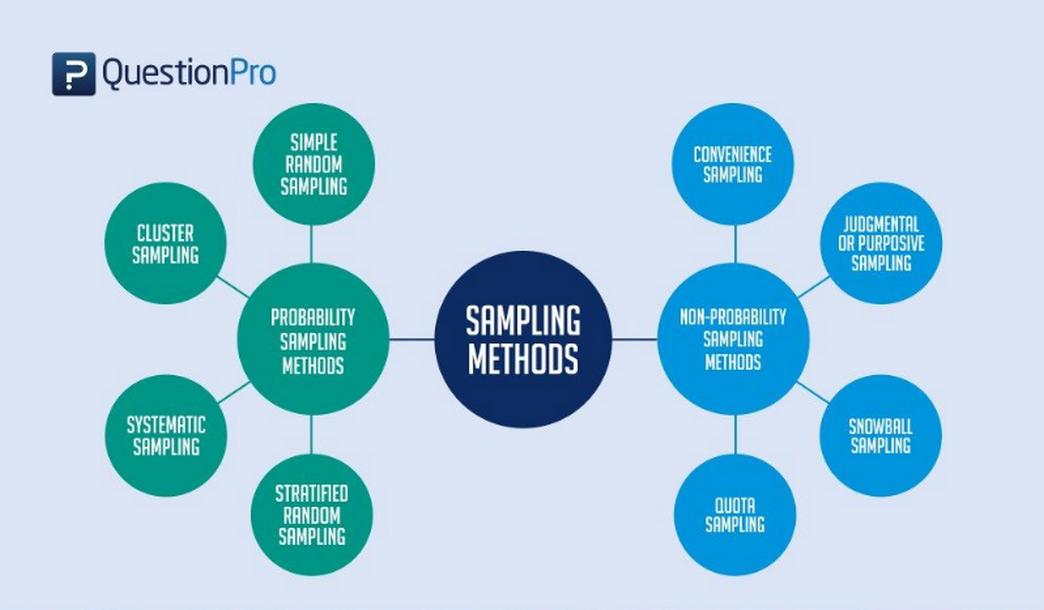


When you conduct research about a group of people, it’s rarely possible to collect data from every person in that group. Instead, you select a sample. The sample is the group of individuals who will actually participate in the research.

To draw valid conclusions from your results, you have to carefully decide how you will select a sample that is representative of the group as a whole. This is called a sampling method. There are two primary types of sampling methods that you can use in your research:

- Probability sampling involves random selection, allowing you to make strong statistical inferences about the whole group.
- Non-probability sampling involves non-random selection based on convenience or other criteria, allowing you to easily collect data.


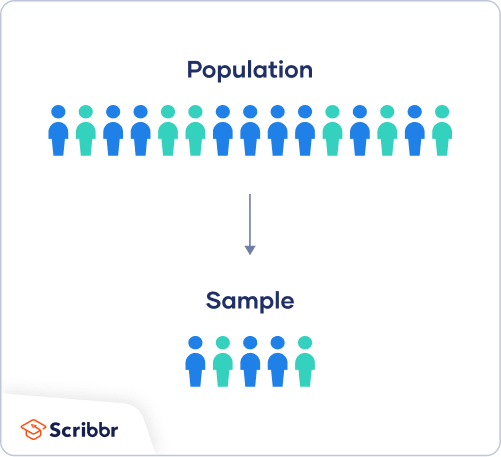


* The `population` is the entire group that you want to draw conclusions about.
* The `sample` is the specific group of individuals that you will collect data from.



## Sample size
The number of individuals you should include in your sample depends on various factors, including the size and variability of the population and your research design. There are different sample size calculators and formulas depending on what you want to achieve with statistical analysis.



## Probability sampling methods

Probability sampling means that every member of the population has a chance of being selected. It is mainly used in quantitative research. If you want to produce results that are representative of the whole population, probability sampling techniques are the most valid choice.


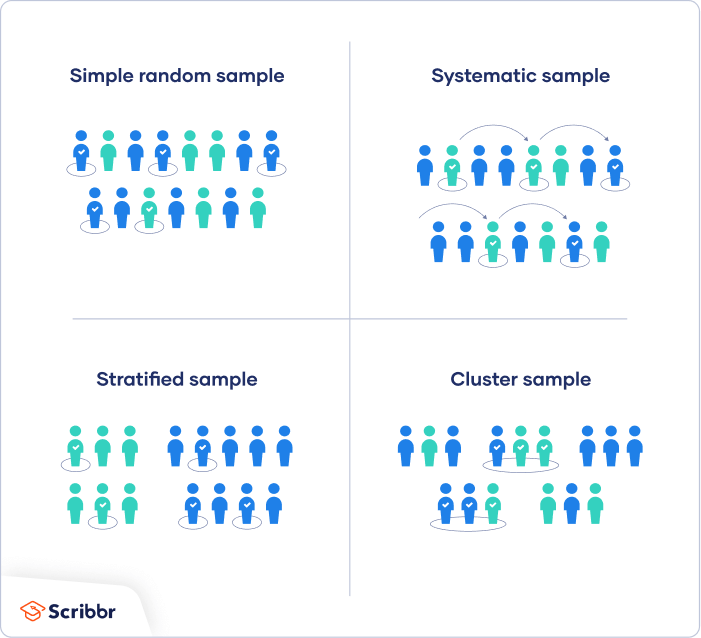

## Non-probability sampling methods


In a non-probability sample, individuals are selected based on non-random criteria, and not every individual has a chance of being included.

This type of sample is easier and cheaper to access, but it has a higher risk of sampling bias. That means the inferences you can make about the population are weaker than with probability samples, and your conclusions may be more limited. If you use a non-probability sample, you should still aim to make it as representative of the population as possible.

Non-probability sampling techniques are often used in exploratory and qualitative research. In these types of research, the aim is not to test a hypothesis about a broad population, but to develop an initial understanding of a small or under-researched population.

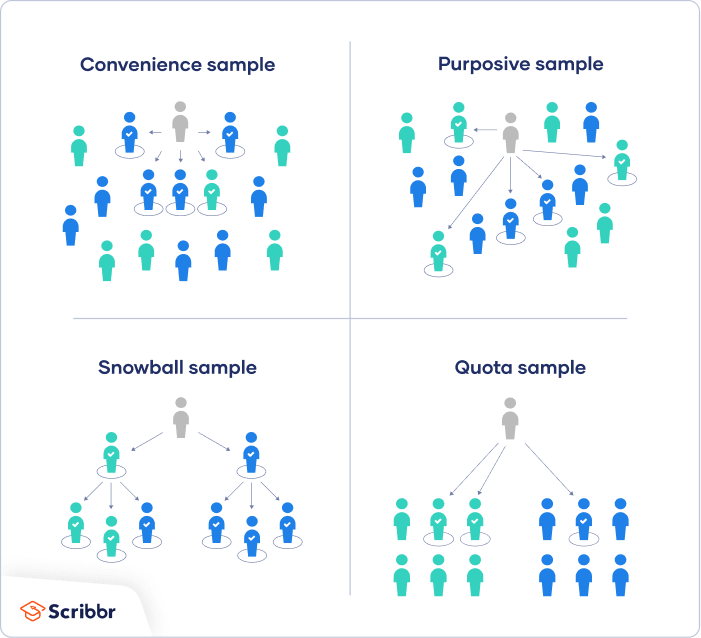



## Conclusion


Sampling is a crucial statistical technique where a subset of individuals is selected from a population to estimate its characteristics. This approach is significant for several reasons:

* Cost-effective: It's less expensive and quicker than studying the whole population.
* Feasibility: Directly studying the entire population is often impractical or impossible.
* Data Quality: Sampling can sometimes yield more accurate results than studying the entire population.

# Random sampling <a id="random_sampling"></a>


### Simple Random Sampling: Every member of the population has an equal chance of being selected.



Sample statistics as estimators of population parameters:

Whenever referring to the population parameter, we refer it in Greek letters.
When referring to the sample estimates, we refer it in English alphabets.



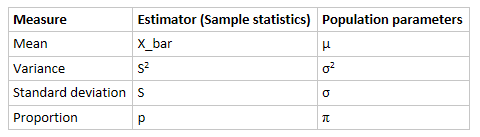


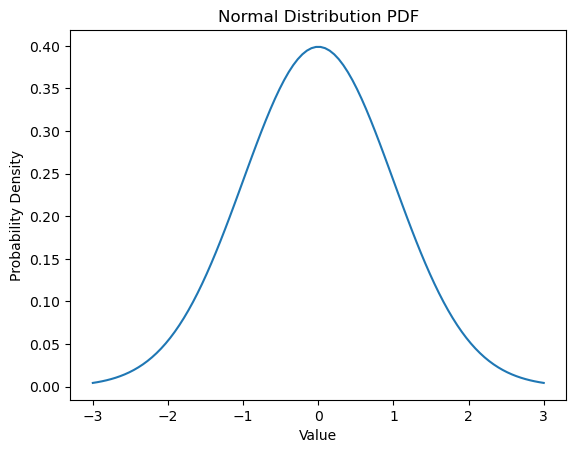

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu, sigma = 0, 1  # mean and standard deviation

# Create a range of values (x) and their corresponding PDF values (y)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the PDF of the normal distribution
plt.plot(x, y)
plt.title('Normal Distribution PDF')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


####  Cumulative Distribution Function (CDF)
The CDF of a normal distribution shows the probability that a random variable will be less than or equal to a certain value.

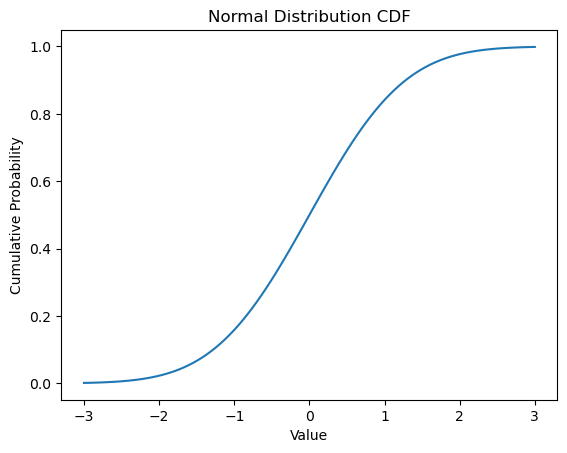

In [13]:
# Generate the CDF values for the range of values
y_cdf = norm.cdf(x, mu, sigma)

# Plot the CDF
plt.plot(x, y_cdf)
plt.title('Normal Distribution CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()


In [87]:
# Normal Random Sampling
import random
random.seed(1234)


mu = 0    
sigma = 1

Population = [random.normalvariate(mu, sigma) for _ in range(100000)]
SampleA = random.sample(Population, 500)
SampleB = random.sample(Population, 500)

print(np.mean(SampleA))
print(np.mean(SampleB))
print(np.std(SampleA))
print(np.std(SampleB))

-0.12893613491441167
-0.11359458871669106
1.1439615321114354
0.7693321093868724


In [51]:
means = [np.mean(random.sample(Population, 1000)) for _ in range(100)]

np.mean(means)

-0.0005560453770383856

The` Random` module in Python provides various functions to generate `pseudo-random` numbers. Pseudo-random means that the numbers are not truly random, but they follow a deterministic pattern that depends on a `seed` value.


The seed value is an initial input that determines `the sequence of random numbers` that will be generated. By default, the seed value is based on the current system time, which makes the random numbers unpredictable.

However, you can also set the seed value manually by using the `random.seed()` function. This allows you to control the random number generation and reproduce the same sequence of numbers for a given seed value.

For example, if you call random.seed(10) and then random.randint(1, 1000), you will always get the same number (865) as the output. But if you change the seed value or do not set it at all, you will get different numbers each time you call random.randint(1, 1000).

Setting the seed value can be useful for **testing, debugging, or encryption purposes** , where you want to have consistent and reproducible results. However, if you want more randomness and unpredictability, you should avoid setting the seed value or change it frequently.

In [88]:
import random


random.seed(1234)


print("First random choice:", random.choice(df['BMI']))
print("Second random choice:", random.choice(df['BMI']))
print("Third random choice:", random.choice(df['BMI']))

First random choice: 28.9
Second random choice: 23.2
Third random choice: 35.3


In [89]:
# Sample from the dataset

sample_size = 30
sample_data = df.sample(n=sample_size, random_state=45)
# sample_data = df.sample(n=sample_size) # This will differ every time you run the program.
sample_data.head(30)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
195            5      158             84             41      210  39.4   
51             1      101             50             15       36  24.2   
66             0      109             88             30        0  32.5   
437            5      147             75              0        0  29.9   
665            1      112             80             45      132  34.8   
382            1      109             60              8      182  25.4   
99             1      122             90             51      220  49.7   
656            2      101             58             35       90  21.8   
394            4      158             78              0        0  32.9   
353            1       90             62             12       43  27.2   
391            5      166             76              0        0  45.7   
479            4      132             86             31        0  28.0   
537            0       57             60              0        0  21.7   
586            8      143             66              0        0  34.9   
128            1      117             88             24      145  34.5   
96             2       92             62             28        0  31.6   
622            6      183             94              0        0  40.8   
692            2      121             70             32       95  39.1   
258            1      193             50             16      375  25.9   
180            6       87             80              0        0  23.2   
336            0      117              0              0        0  33.8   
101            1      151             60              0        0  26.1   
30             5      109             75             26        0  36.0   
758            1      106             76              0        0  37.5   
342            1        0             68             35        0  32.0   
223            7      142             60             33      190  28.8   
257            2      114             68             22        0  28.7   
604            4      183              0              0        0  28.4   
332            1      180              0              0        0  43.3   
176            6       85             78              0        0  31.2   

     DiabetesPedigreeFunction  Age Outcome  
195                     0.395   29       1  
51                      0.526   26       0  
66                      0.855   38       1  
437                     0.434   28       0  
665                     0.217   24       0  
382                     0.947   21       0  
99                      0.325   31       1  
656                     0.155   22       0  
394                     0.803   31       1  
353                     0.580   24       0  
391                     0.340   27       1  
479                     0.419   63       0  
537                     0.735   67       0  
586                     0.129   41       1  
128                     0.403   40       1  
96                      0.130   24       0  
622                     1.461   45       0  
692                     0.886   23       0  
258                     0.655   24       0  
180                     0.084   32       0  
336                     0.932   44       0  
101                     0.179   22       0  
30                      0.546   60       0  
758                     0.197   26       0  
342                     0.389   22       0  
223                     0.687   61       0  
257                     0.092   25       0  
604                     0.212   36       1  
332                     0.282   41       1  
176                     0.382   42       0

### Random Sampling with and without Replacement


In simple **random sampling with replacement**, each selected element is returned to the population before the next selection. This means that the same element can be chosen multiple times during the sampling process. The key advantage of this method is that it maintains a constant probability for each element to be selected, irrespective of previous selections.

In [18]:
import random

# Set seed for reproducibility
random.seed(123)

# Create a population
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Perform simple random sampling with replacement
sample_with_replacement = random.choices(population, k=5)

# Display the sampled elements
print(sample_with_replacement)

[1, 1, 5, 2, 10]


In simple **random sampling without replacement**, each selected element is not returned to the population before the next selection. This means that once an element is selected, it is removed from consideration for subsequent selections. This method ensures that each element can only be chosen once during the sampling process.

In [19]:
import random

# Set seed for reproducibility
random.seed(123)

# Create a population
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Perform simple random sampling without replacement
sample_without_replacement = random.sample(population, k=5)

# Display the sampled elements
print(sample_without_replacement)

[1, 5, 2, 7, 4]


In [66]:
uniform_list = np.random.uniform(-10,10,50)
print("Uniformly Distributed Numbers: ", uniform_list)

Uniformly Distributed Numbers:  [-6.17508414e+00 -9.46826181e+00 -8.36547631e+00 -3.10372758e+00
 -7.00549602e+00 -7.24912924e+00 -5.33664549e-01 -8.91573531e+00
 -9.40537190e+00 -7.07302611e+00 -2.42707695e+00 -9.35497703e+00
  9.36091187e+00 -1.07581941e+00 -9.05807690e+00  2.59996007e+00
 -8.61672879e+00  4.16214757e+00  2.77611824e+00  3.00963840e+00
  2.09196696e+00 -7.52775219e+00 -9.53877534e+00 -1.82125667e+00
  4.88866266e-02 -6.86749181e+00 -7.79016715e+00  9.16013691e+00
  6.41145416e+00 -3.07138032e+00  1.14440047e+00 -4.10081317e+00
  5.68276985e+00  3.73485708e+00  7.63786464e+00  6.00711692e+00
 -7.71144706e+00  3.61570480e+00  7.17143087e+00 -5.48177844e+00
  8.57680323e-03 -2.89613472e+00 -5.73944492e+00  6.03683916e+00
 -9.84417592e+00  5.73861829e+00 -4.39946829e+00 -6.01323510e+00
  3.22594699e+00 -7.48470477e+00]


In [64]:
normal_list = np.random.normal(6,1,10)
print("Normally Distributed Numbers: ", normal_list)

Normally Distributed Numbers:  [5.42599685 4.50198347 5.55427815 5.92410468 8.04299437 5.09032877
 5.87481187 4.76100033 4.53580361 5.09103345]


# Central Limit Theorem <a id="Central_LimitTheorem"></a>


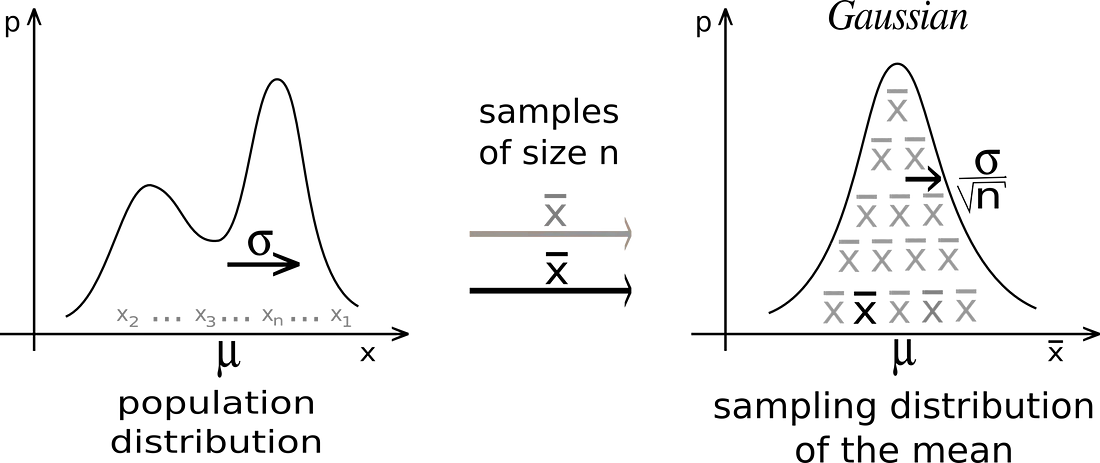




The Central Limit Theorem (CLT) is a fundamental theorem in statistics that describes the behavior of the sample mean of a large number of independent, identically distributed random variables.

The CLT states that as the sample size increases, the distribution of the sample mean approaches a normal distribution, regardless of the shape of the original distribution.


**This means that if we take a large number of samples from any distribution, and calculate the mean of each sample, the distribution of the sample means will be approximately normal.**






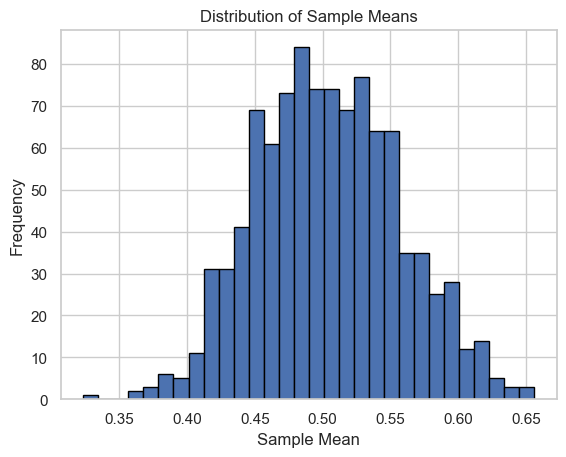

In [68]:
# Step 1: Choose a distribution
# For this example, let's use a uniform distribution
population = np.random.uniform(low=0, high=1, size=10000)

# Step 2: Generate a large number of samples
sample_size = 30
num_samples = 1000
sample_means = []

# Step 3: Calculate the mean of each sample
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

# print(sample_means)
# Step 4: Plot the distribution of these sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

### Step 1: Choose a Distribution
- Here, we select a uniform distribution as our population from which to draw samples. The uniform distribution is continuous, with all values in the range from 0 to 1 having an equal probability of occurrence. This is achieved using `np.random.uniform`, specifying a low of 0, a high of 1, and generating a total of 10,000 values.

### Step 2: Generate a Large Number of Samples
- We define parameters for our sampling process: `sample_size` as 30 and `num_samples` as 1000. This means we will draw 1000 samples, each containing 30 values selected randomly from our population.

### Step 3: Calculate the Mean of Each Sample
- For each of the 1000 samples, we randomly select 30 values from the population (without replacement) using `np.random.choice`. We then calculate the mean of these values using `np.mean` and append this mean to the list `sample_means`. This process is repeated 1000 times to gather a large set of sample means.

### Step 4: Plot the Distribution of These Sample Means
- Using `plt.hist`, we plot a histogram of the sample means collected in the previous step. The histogram bins are set to 30, and an edge color is defined for clarity. This plot visualizes the distribution of sample means, which, according to the Central Limit Theorem, should form an approximately normal distribution even though the original population distribution was uniform.


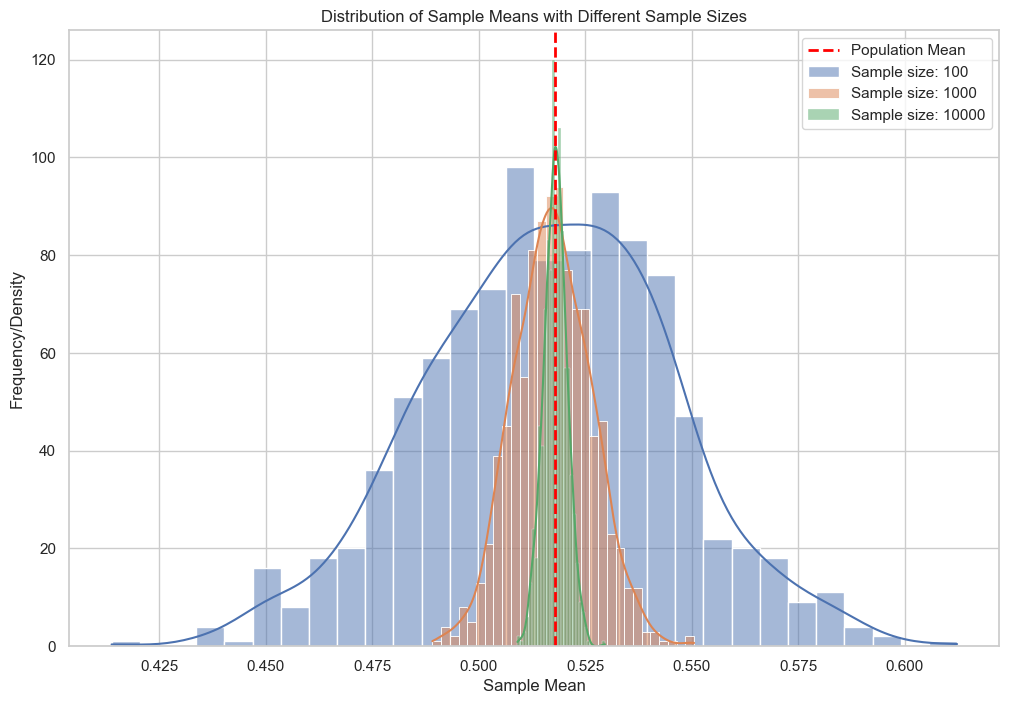

In [69]:


# Step 1: Choose a distribution and create a large population
population = np.random.uniform(low=0, high=1, size=100)  # Larger population size
population_mean = np.mean(population)

# Different numbers of samples
sample_sizes = [100, 1000, 10000]

plt.figure(figsize=(12, 8))

# Step 2, 3, 4: Generate samples, calculate means, and plot for each sample size
for sample_size in sample_sizes:
    sample_means = [np.mean(np.random.choice(population, size=sample_size)) for _ in range(1000)]
    sns.histplot(sample_means, kde=True, label=f'Sample size: {sample_size}', bins=30)

# Plot the population mean line
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')

plt.title('Distribution of Sample Means with Different Sample Sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency/Density')
plt.legend()
plt.show()

## Objective
The objective of this code block is to demonstrate the effect of different sample sizes on the distribution of sample means, illustrating the Central Limit Theorem (CLT). This is achieved by generating samples of various sizes from a uniform distribution, calculating the mean of each sample, and plotting the distribution of these means. The visualization includes the population mean to show how the sample means converge around it as sample sizes increase, highlighting the CLT's prediction that the sampling distribution of the mean will become increasingly normal with larger sample sizes.

### Step 1: Choose a Distribution and Create a Large Population
- Initially, a uniform distribution is selected to generate a population of values. `np.random.uniform` is used to create a population with 100,000 values, each ranging from 0 to 1, ensuring each value has an equal chance of being chosen. The mean of this population is also calculated to serve as a reference for later comparison.

### Different Numbers of Samples
- We define an array `sample_sizes` with different sizes (10, 1000, 10000) to investigate how the size of the sample affects the distribution of its mean.

### Step 2, 3, 4: Generate Samples, Calculate Means, and Plot for Each Sample Size
- For each specified sample size, 1000 samples are generated, and


## Comparing Binomial and Uniform Sampling

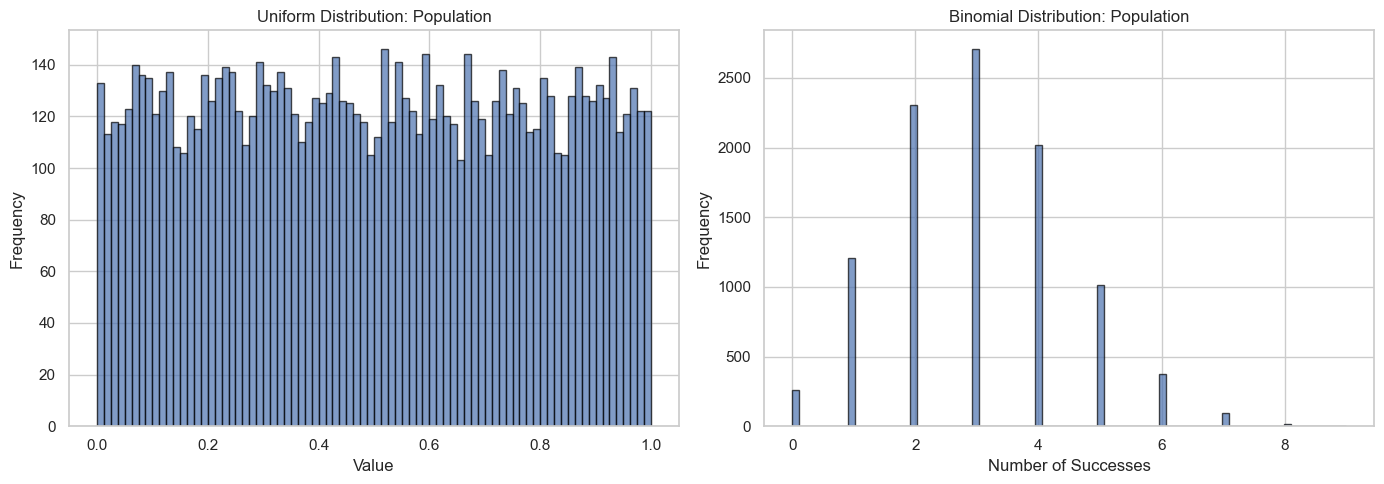

In [71]:
# Setup for both Uniform and Binomial distributions
uniform_population = np.random.uniform(low=0, high=1, size=10000)
binomial_population = np.random.binomial(n=10, p=0.3, size=10000)

# Parameters for sampling
sample_size = 30
num_samples = 1000

# Plotting the original populations for both Uniform and Binomial distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Uniform Distribution Population
axes[0].hist(uniform_population, bins=80, edgecolor='black', alpha=0.7)
axes[0].set_title('Uniform Distribution: Population')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Binomial Distribution Population
axes[1].hist(binomial_population, bins=80, edgecolor='black', alpha=0.7)
axes[1].set_title('Binomial Distribution: Population')
axes[1].set_xlabel('Number of Successes')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This code effectively compares the visual appearance of two fundamentally different types of distributions by plotting their populations side by side. The uniform distribution is continuous and evenly spread across its range, while the binomial distribution is discrete, showing the frequency of successes in a given number of trials.


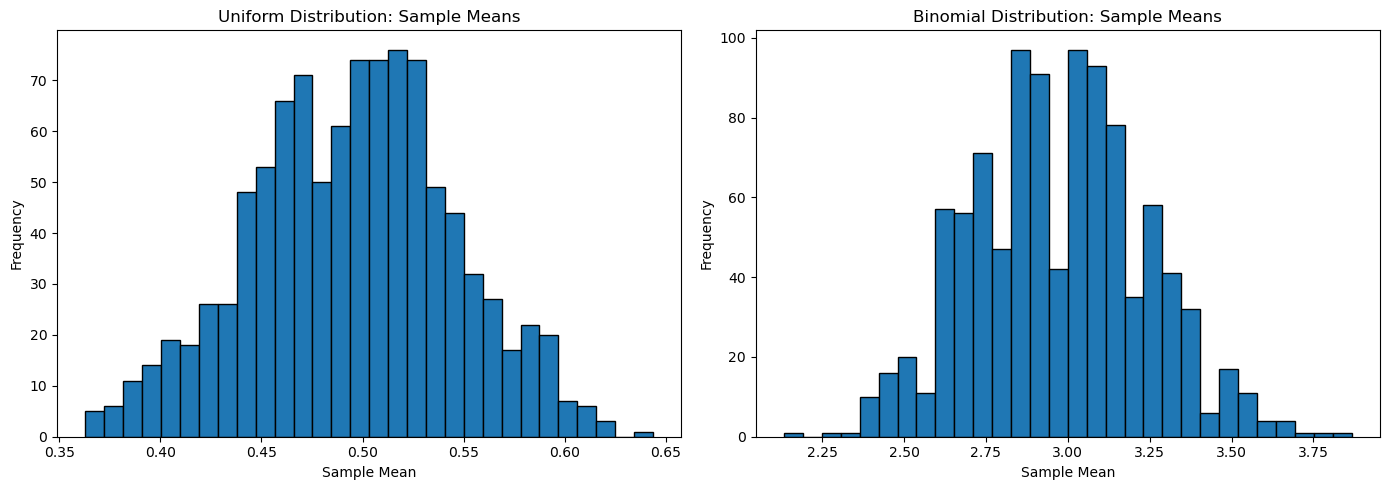

In [25]:


# Sampling and calculating means for Uniform distribution
uniform_sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(uniform_population, size=sample_size)
    uniform_sample_means.append(np.mean(sample))

# Sampling and calculating means for Binomial distribution
binomial_sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(binomial_population, size=sample_size)
    binomial_sample_means.append(np.mean(sample))

# Plotting the distributions of sample means side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Uniform Distribution Sample Means
axes[0].hist(uniform_sample_means, bins=30, edgecolor='black')
axes[0].set_title('Uniform Distribution: Sample Means')
axes[0].set_xlabel('Sample Mean')
axes[0].set_ylabel('Frequency')

# Binomial Distribution Sample Means
axes[1].hist(binomial_sample_means, bins=30, edgecolor='black')
axes[1].set_title('Binomial Distribution: Sample Means')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Objective
The objective of this code block is to compare the Central Limit Theorem's effects across two different types of distributions: uniform and binomial. By sampling from each distribution, calculating the means of these samples, and plotting the distributions of these sample means side by side, we aim to visually demonstrate that the CLT holds true regardless of the underlying population distribution. This comparison highlights the universality of the CLT in approaching a normal distribution for the sample means as the number of samples increases.

### Setup for both Uniform and Binomial distributions
- Two populations are generated: one from a uniform distribution using `np.random.uniform` with values between 0 and 1, and another from a binomial distribution using `np.random.binomial`, with parameters `n=10` (number of trials) and `p=0.5` (probability of success in each trial). Both populations are of size 10,000.

### Parameters for sampling
- We define `sample_size` as 30 and `num_samples` as 1000. These parameters are used for both distributions to ensure a consistent comparison. This setup implies that we will draw 1000 samples from each population, with each sample containing 30 observations.

### Sampling and calculating means for Uniform distribution
- For the uniform distribution, we draw 1000 samples, each of size 30, from the uniform population. We calculate the mean of each sample and store these means in `uniform_sample_means`, aiming to analyze the distribution of these means.

### Sampling and calculating means for Binomial distribution
- Similarly, for the binomial distribution, we also draw 1000 samples of size 30 and calculate the mean of each sample. These means are stored in `binomial_sample_means`, preparing for a comparative analysis with the uniform distribution.

### Plotting the distributions of sample means side by side
- Using matplotlib's subplot feature, we plot the distribution of sample means for both the uniform and binomial distributions side by side. Each subplot shows a histogram of the sample means for its respective distribution, providing a visual comparison of how sample means distribute around the population mean. This dual-plot setup effectively illustrates the CLT's applicability to different distributions, showing that the sample means tend towards a normal distribution regardless of the population's initial distribution shape.


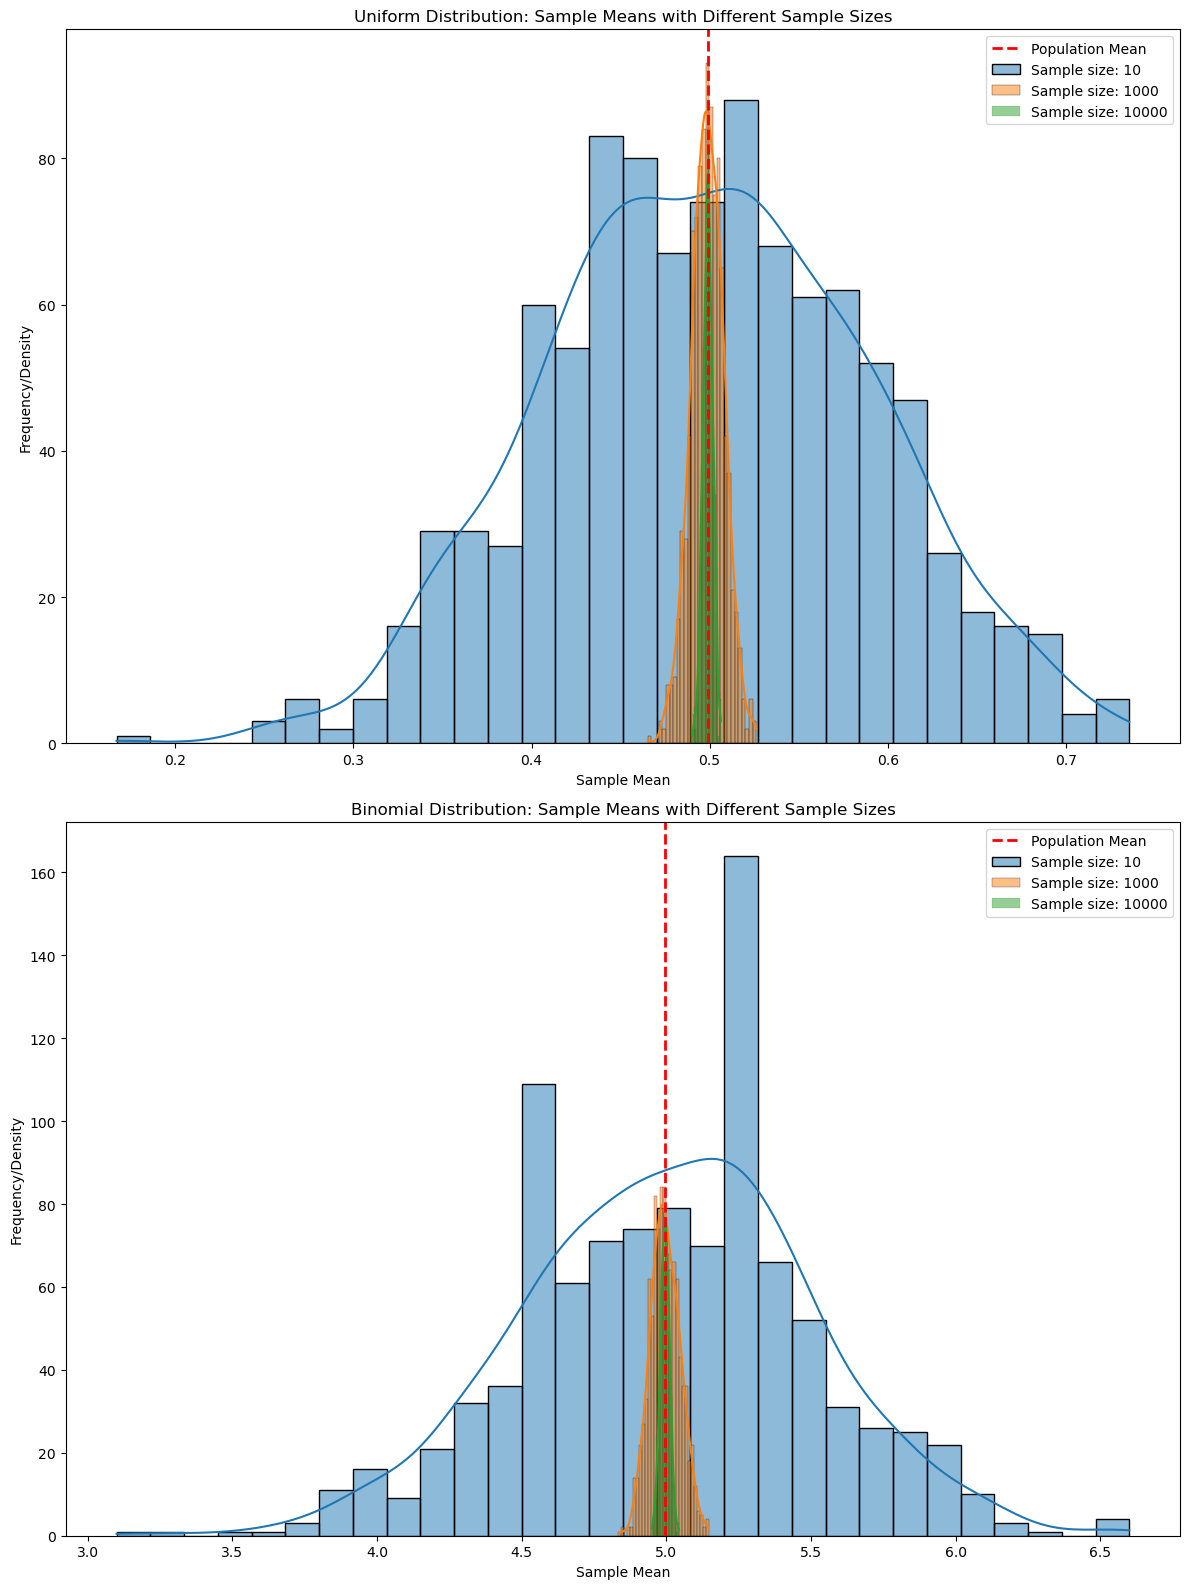

In [26]:
# Parameters for demonstration
sample_sizes = [10, 1000, 10000]

# Uniform Distribution setup
uniform_population = np.random.uniform(low=0, high=1, size=100000)
population_mean_uniform = np.mean(uniform_population)

# Binomial Distribution setup
n, p = 10, 0.5
binomial_population = np.random.binomial(n, p, size=100000)
population_mean_binomial = np.mean(binomial_population)

# Setup for plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Generate samples, calculate means, and plot for Uniform distribution
for sample_size in sample_sizes:
    sample_means_uniform = [np.mean(np.random.choice(uniform_population, size=sample_size)) for _ in range(1000)]
    sns.histplot(sample_means_uniform, kde=True, ax=axes[0], label=f'Sample size: {sample_size}', bins=30)

# Plot the population mean line for Uniform distribution
axes[0].axvline(population_mean_uniform, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Uniform Distribution: Sample Means with Different Sample Sizes')
axes[0].set_xlabel('Sample Mean')
axes[0].set_ylabel('Frequency/Density')
axes[0].legend()

# Generate samples, calculate means, and plot for Binomial distribution
for sample_size in sample_sizes:
    sample_means_binomial = [np.mean(np.random.choice(binomial_population, size=sample_size)) for _ in range(1000)]
    sns.histplot(sample_means_binomial, kde=True, ax=axes[1], label=f'Sample size: {sample_size}', bins=30)

# Plot the population mean line for Binomial distribution
axes[1].axvline(population_mean_binomial, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[1].set_title('Binomial Distribution: Sample Means with Different Sample Sizes')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Frequency/Density')
axes[1].legend()

plt.tight_layout()
plt.show()


## Objective
This code block aims to illustrate the Central Limit Theorem (CLT) by demonstrating how sample means converge towards the population mean with increasing sample sizes, across two different distributions: uniform and binomial. It visually compares the effects of sample size on the distribution of sample means for each distribution, highlighting the CLT's assertion that the sampling distribution of the mean approaches a normal distribution as sample size increases, irrespective of the population's original distribution.

### Parameters for Demonstration
- An array `sample_sizes` is defined with values [10, 1000, 10000], representing the varying sizes of samples to be drawn from the populations. This variation allows us to observe the impact of sample size on the sampling distribution of the mean.

### Uniform Distribution Setup
- A uniform distribution population is created using `np.random.uniform` with values ranging from 0 to 1, and a large population size of 100,000. The mean of this population is calculated to serve as a benchmark for comparison against the sample means.

### Binomial Distribution Setup
- Similarly, a binomial distribution population is generated using `np.random.binomial` with parameters `n=10` (number of trials) and `p=0.5` (probability of success in each trial), also with a population size of 100,000. The mean of the binomial population is calculated, providing a reference point for the sample means.

### Setup for Plotting
- Two subplots are created using `plt.subplots`, arranged vertically, to display the distribution of sample means for each distribution separately. This layout facilitates a direct comparison between the two distributions.

### Generate Samples, Calculate Means, and Plot for Uniform Distribution
- For each specified sample size in `sample_sizes`, 1000 samples are drawn from the uniform population, and the mean of each sample is calculated. These sample means are then plotted using `sns.histplot` on the first subplot, with a Kernel Density Estimation (KDE) to show the smooth distribution of sample means. Each sample size is represented as a separate line in the plot, allowing for comparison of their effects on the distribution shape.

### Plot the Population Mean Line for Uniform Distribution
- A vertical line representing the population mean is added to the plot of the uniform distribution sample means, highlighting how closely the sample means cluster around the population mean as sample size increases.

### Generate Samples, Calculate Means, and Plot for Binomial Distribution
- The process is repeated for the binomial distribution, with 1000 samples drawn for each specified sample size, their means calculated, and plotted on the second subplot using `sns.histplot` with KDE.

### Plot the Population Mean Line for Binomial Distribution
- Similarly, a vertical line representing the binomial population mean is added to the binomial distribution plot, visually demonstrating the convergence of sample means to the population mean with increasing sample sizes.

This demonstration visually reinforces the CLT by showing that regardless of whether the population distribution is uniform or binomial, the distribution of sample means becomes more normal and clusters more tightly around the population mean as sample size increases.


# Practical exercise: Sampling Experiment<a id="sampling_experiment"></a>


In [27]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1

## Point estimate
We are trying to make an estimation based of a large population based (like all of the students in the university, all of the workers in the industry, or in this case all of the wine quality) on the a sample.

So in this case, let us assume that we are quality control of the wine manufacturing plant and we have to make inference about the whole of the population based on the data that we have in hand. Obviously, we cannot do this on all of the wine bottle, because wine are aged and we will not be able to pop open all the bottles. So we select some sample of the wine and say, if those are okay, then everything else should be okay as well.

## Comparing people with more than 2 Pregnancies Glucose to Population Glucose

In [28]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1

In [72]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<Axes: >

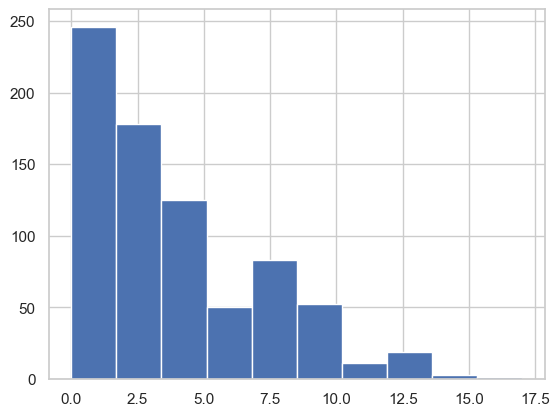

In [74]:
df['Pregnancies'].hist()

In [82]:
# Assuming df is your dataframe after reading the data
# Step 1: Filter the dataset for more than 2 pregnancies
filtered_df = df[df['Pregnancies'] > 2]

# Step 2: Perform simple random sampling on the filtered data
sample_size = 100  # or whatever sample size you deem appropriate
sample = filtered_df.sample(n=sample_size, random_state=1)

# Step 3: Calculate point estimators for the sample and the population
sample_mean = sample['Glucose'].mean()
population_mean = df['Glucose'].mean()

# Compare the point estimators
print(f"Sample Mean Glucose: {sample_mean}")
print(f"Population Mean Glucose: {population_mean}")

Sample Mean Glucose: 126.59
Population Mean Glucose: 120.89453125


In [81]:
# Define the number of bootstraps
n_bootstraps = 1000
bootstrap_means = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    bootstrap_sample = sample['Glucose'].sample(n=sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()

# Calculate the distribution of the sample means
sample_mean_distribution = np.mean(bootstrap_means)
sample_mean_std_dev = np.std(bootstrap_means)

# Output the distribution mean and standard deviation
print(f"Distribution of Sample Means - Mean: {sample_mean_distribution}, Standard Deviation: {sample_mean_std_dev}")

# If you want to compare it to the population mean
print(f"Population Mean Glucose: {population_mean}")


Distribution of Sample Means - Mean: 126.54871, Standard Deviation: 3.2856427431934834
Population Mean Glucose: 120.89453125


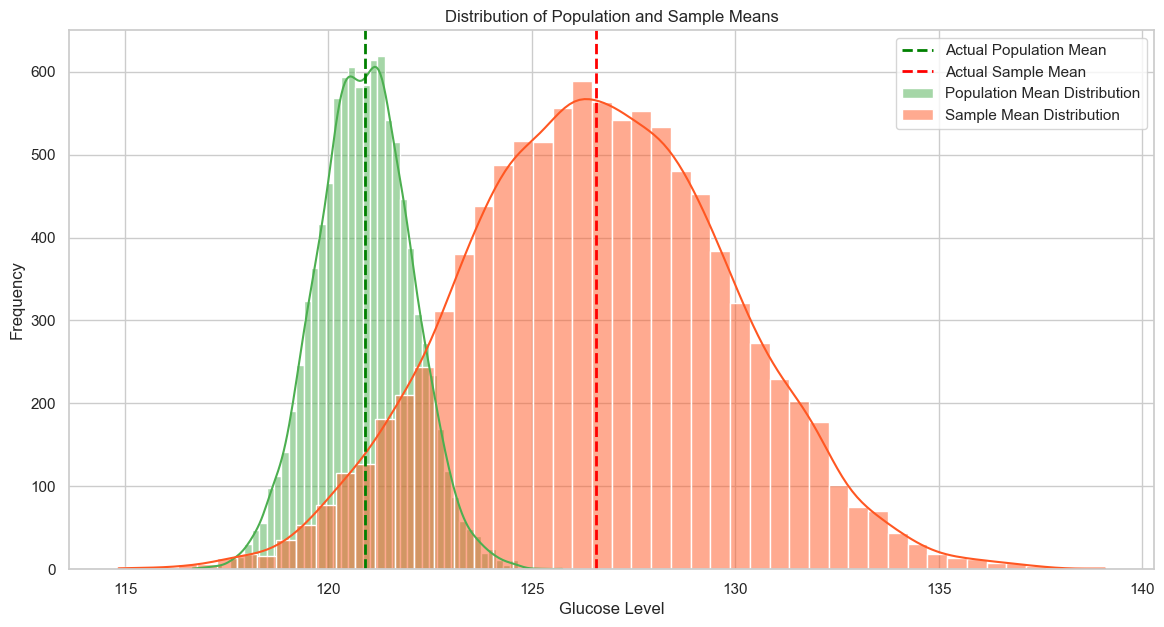

In [44]:
import seaborn as sns

# Set style and context
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 7))

# Population mean distribution
sns.histplot(population_means, bins=50, color='#4CAF50', kde=True, label='Population Mean Distribution')

# Sample mean distribution
sns.histplot(bootstrap_means, bins=50, color='#FF5722', kde=True, label='Sample Mean Distribution')

# Plot actual population and sample means
plt.axvline(population_mean, color='green', linestyle='dashed', linewidth=2, label='Actual Population Mean')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Actual Sample Mean')

# Labels and legend
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Population and Sample Means')
plt.legend()
plt.show()


## Objective
The objective of this code block is to compare glucose levels in two specific groups within a given population: individuals with more than two pregnancies and the overall population. It involves filtering the dataset to focus on the targeted subgroup, performing simple random sampling, and then using bootstrapping to estimate the sampling distribution of the mean. This is followed by comparing these estimates with the overall population mean to observe any notable differences.

### Step 1: Filter the Dataset for More Than 2 Pregnancies
- The dataset `df` is filtered to include only those rows where the number of pregnancies is greater than 2. This creates a subset `filtered_df` focusing on individuals with more than two pregnancies.

### Step 2: Perform Simple Random Sampling on the Filtered Data
- From the filtered dataset, a sample of a specified size (in this case, 100) is randomly selected without replacement using `sample(n=sample_size, random_state=1)`. The `random_state` parameter ensures the reproducibility of the results.

### Step 3: Calculate Point Estimators for the Sample and the Population
- The mean glucose level is calculated for both the random sample (`sample_mean`) and the entire population (`population_mean`) to provide point estimates that can be compared to assess any differences.

### Bootstrapping Procedure
- A specified number of bootstrap samples (`n_bootstraps`, here 1000) are drawn with replacement from the original sample to create a distribution of sample means. This bootstrapping process simulates the sampling distribution and provides an estimate of the mean (`sample_mean_distribution`) and standard deviation (`sample_mean_std_dev`) of the sample means.

### Comparison to the Population Mean
- The results from the bootstrapping are then compared to the actual population mean to analyze how well the sample represents the population.

### Plotting the Distribution of Population and Sample Means
- The final part of the code involves visualizing the distribution of the population and sample means using histograms. The actual means of the population and the sample are plotted as dashed lines on the histogram for a direct visual comparison. This visualization helps in understanding the variability and the expected range of the sample means around the population mean.

### Bootstrapping for the Entire Population
- As an additional step, bootstrapping is also performed on the entire population's glucose levels. This creates a distribution of means that would be expected if we were to take many samples from the population. Both this distribution and the bootstrap distribution from the smaller sample are plotted to compare their shapes, centers, and spreads.

The plots and calculations in this code block serve to provide insights into the central tendency and variability within the subgroup of individuals with more than two pregnancies, as compared to the general population, demonstrating statistical concepts such as point estimation, variability, and the use of bootstrapping as a resampling technique.


## BootStrapping


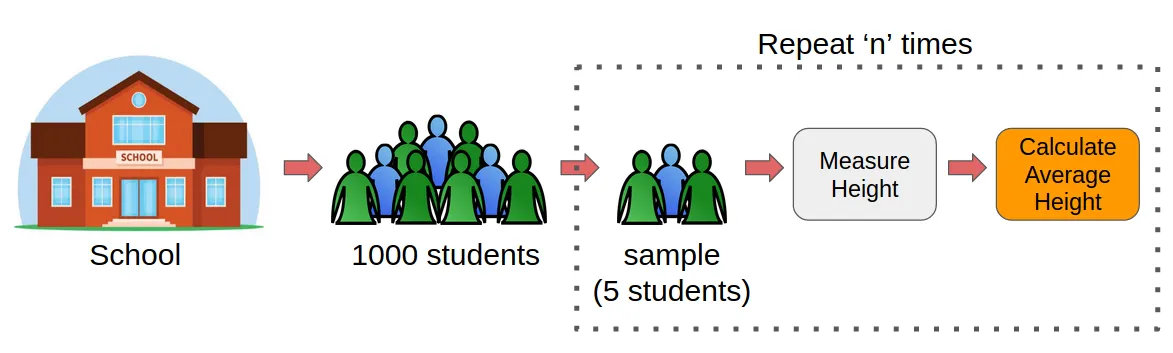




## Difference Between Bootstrap and Sampling

### What is Sampling?
Sampling is the process of selecting a subset of individuals, items, or observations from within a larger population to estimate characteristics of the whole population. The key principles of sampling involve randomness and representativeness to ensure that the sample accurately reflects the broader population. There are various sampling methods, including simple random sampling, stratified sampling, cluster sampling, and systematic sampling.

- **Simple Random Sampling**: Every member of the population has an equal chance of being selected.
- **Stratified Sampling**: The population is divided into subgroups, or strata, and random samples are taken from each stratum.
- **Cluster Sampling**: The population is divided into clusters, usually geographically, and entire clusters are randomly selected.
- **Systematic Sampling**: Every nth member of the population is selected after a random starting point.

### What is Bootstrap?
Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly resampling with replacement from the original sample. Unlike traditional sampling methods which aim to infer about the population, bootstrapping infers about the sample itself and uses this information to estimate the precision of sample statistics (like the mean or median).

The bootstrap method involves taking repeated samples (subsets) from the single original sample. These subsets are typically the same size as the original sample and are sampled with replacement, meaning the same observation can appear more than once in a bootstrap sample.

### Key Differences
- **Purpose**: Sampling is used to estimate population parameters, while bootstrapping estimates the distribution of a sample statistic.
- **Data Used**: Sampling involves the original data from the population, whereas bootstrapping uses data from the sample.
- **Replacement**: Traditional sampling methods generally sample without replacement from the population, while bootstrapping always samples with replacement from the sample.
- **Sample Size**: In traditional sampling, the sample size is usually smaller than the population size. In bootstrapping, the resample size is the same as the original sample size.
- **Replication**: Bootstrapping involves taking thousands of resamples to create a distribution of the sample statistic, while traditional sampling typically involves taking just one sample from the population.

Overall, while both sampling and bootstrapping are methods used in statistics to understand characteristics of data, they are used for different purposes and involve different processes.

# Q&A and Troubleshooting <a id="QA-and-Troubleshooting"></a>

#### Statistical Testing and Analysis
- **Exploring Statistical Testing with Python**:
  - [Statistical Testing and Analysis Notebook on Kaggle](https://www.kaggle.com/code/saurav9786/statistical-testing-and-analysis/notebook)

#### Bootstrap Sampling
- **Understanding Bootstrap Sampling in Statistics and Machine Learning**:
  - [What is Bootstrap Sampling in Statistics and Machine Learning?](https://medium.com/analytics-vidhya/what-is-bootstrap-sampling-in-statistics-and-machine-learning-4bb510fa4a8c)

#### Central Limit Theorem
- **Exploration of the Central Limit Theorem and Gaussian Distribution**:
  - [A Tidy Examination of the Relationship Between Central Limit Theorem and Gaussian Distribution](https://ogre51.medium.com/central-limit-theorem-gaussian-distribution-a-tidy-examination-of-their-relationship-d28836071d2e)

#### Practical Exercises on Sampling Distributions
- **Sampling Distributions with Python**:
  - [Sampling Distributions Notebook on GitHub](https://github.com/dennislamcv1/UoMStatistics/blob/master/Understanding%20and%20Visualizing%20Data%20with%20Python/nhanes_sampling_distributions.ipynb)
  - [Sampling from a Biased Population Notebook on GitHub](https://github.com/dennislamcv1/UoMStatistics/blob/master/Understanding%20and%20Visualizing%20Data%20with%20Python/Sampling_from_a_Biased_Population.ipynb)

#### Statistics with Python
- **Comprehensive Guides on Statistics with Python**:
  - [Statistics with Python on GeeksforGeeks](https://www.geeksforgeeks.org/statistics-with-python/)
  - [Simple Random Sampling Guide](https://levelup.gitconnected.com/a-comprehensive-guide-to-simple-random-sampling-with-and-without-replacement-in-r-and-python-09202e78f2ad)
  - [Mastering Random Sampling in Python](https://medium.com/m/global-identity-2?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Fmastering-random-sampling-in-python-ac2df84b7d3f)
  - [Sampling Methods Explained](https://www.scribbr.com/methodology/sampling-methods/)
  - [Sampling Methods on Analytics Vidhya](https://medium.com/analytics-vidhya/sampling-methods-6c6e21773a1c)

#### Statistics Tutorials
- **In-depth Statistics Tutorials**:
  - [Statistics Tutorial on Kaggle](https://www.kaggle.com/code/carlolepelaars/statistics-tutorial)
  - [Randomness and Reproducibility Notebook on GitHub](https://github.com/dennislamcv1/UoMStatistics/blob/master/Understanding%20and%20Visualizing%20Data%20with%20Python/Randomness_and_Reproducibility.ipynb)

#### Diabetes Dataset
- **Pima Indians Diabetes Database for Analysis**:
  - [Diabetes Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/code?datasetId=228&sortBy=voteCount)

#### Additional Resources on Sampling and CLT
- **Further Discussions and Tutorials on Sampling and CLT**:
  - [Kaggle Discussion on Sampling and CLT](https://www.kaggle.com/discussions/general/360311)
  - [Learn Statistics: Sampling & Sample Distribution on Kaggle](https://www.kaggle.com/code/gireeshs/learn-statistics-1-sampling-sample-distribution)
  - [Central Limit Theorem Simulation with Python](https://medium.com/towards-data-science/central-limit-theorem-simulation-with-python-c80f8d3a6755)
  - [Central Limit Theorem Example with Python](https://medium.com/mlearning-ai/central-limit-theorem-lets-learn-with-an-example-using-python-4801b8d1c6b5)



# Assignment <a id="Assignment"></a>

### Assignment 1 : Comparing BMI Distributions from Different Outcome Classes


Use Python to filter the health dataset into two groups based on diabetes outcome, perform random sampling within each group, and compare the BMI distributions from these samples.

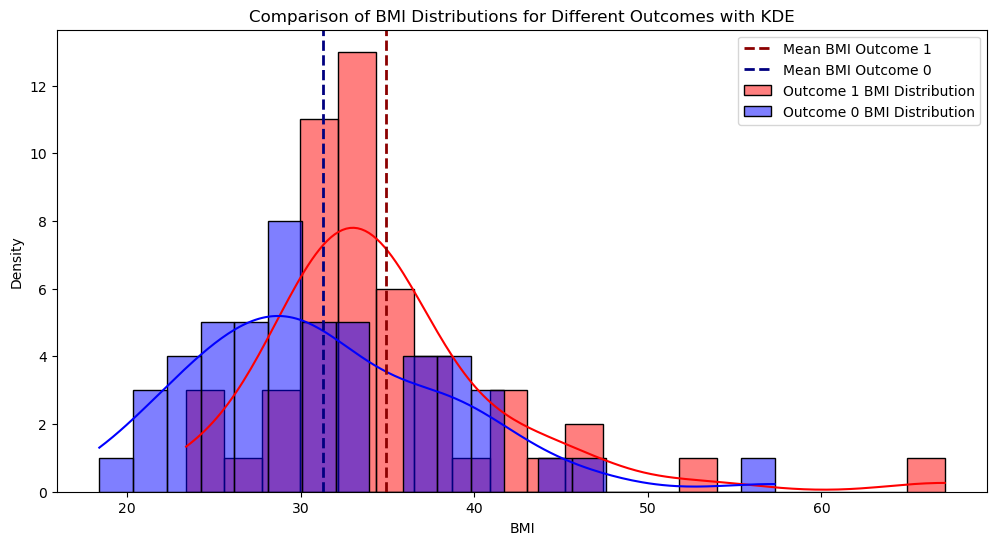

Mean BMI of sample with Outcome 1: 34.94
Mean BMI of sample with Outcome 0: 31.309999999999995


In [33]:
# Filter the dataset into two groups based on Outcome
df_outcome_1 = df[df['Outcome'] == 1]
df_outcome_0 = df[df['Outcome'] == 0]

# Define the sample size
sample_size = 50  # Adjust the size as necessary

# Perform random sampling within each group
sample_outcome_1 = df_outcome_1['BMI'].sample(n=sample_size, random_state=1)
sample_outcome_0 = df_outcome_0['BMI'].sample(n=sample_size, random_state=1)

# Calculate the mean BMI for each sample
mean_bmi_outcome_1 = sample_outcome_1.mean()
mean_bmi_outcome_0 = sample_outcome_0.mean()

# Plotting the BMI distributions of the samples with KDE
plt.figure(figsize=(12, 6))

# Outcome 1 BMI distribution with KDE
sns.histplot(sample_outcome_1, kde=True, bins=20, color='red', label='Outcome 1 BMI Distribution')

# Outcome 0 BMI distribution with KDE
sns.histplot(sample_outcome_0, kde=True, bins=20, color='blue', label='Outcome 0 BMI Distribution')

# Plot actual sample means
plt.axvline(mean_bmi_outcome_1, color='darkred', linestyle='dashed', linewidth=2, label='Mean BMI Outcome 1')
plt.axvline(mean_bmi_outcome_0, color='navy', linestyle='dashed', linewidth=2, label='Mean BMI Outcome 0')

# Labels and legend
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Comparison of BMI Distributions for Different Outcomes with KDE')
plt.legend()
plt.show()


# Print the mean BMI of each sample
print(f"Mean BMI of sample with Outcome 1: {mean_bmi_outcome_1}")
print(f"Mean BMI of sample with Outcome 0: {mean_bmi_outcome_0}")



### Assignment 2 :  Observing the Central Limit Theorem in Python for BMI



Demonstrate the Central Limit Theorem (CLT) using Body Mass Index (BMI) values from the health dataset. Generate multiple samples and compute their means to observe the emergence of a normal distribution as predicted by the CLT.

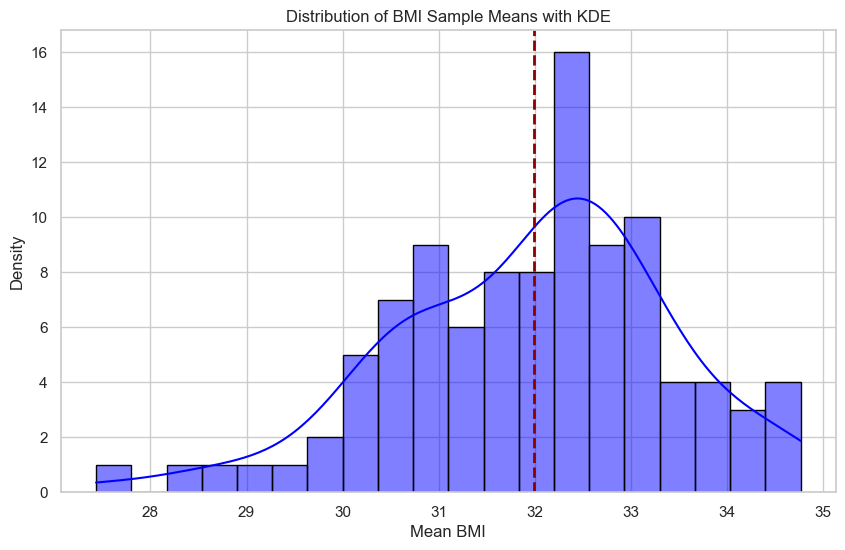

In [86]:
# Select samples and calculate sample means
sample_sizes = 30
num_samples = 100
sample_means = []

# Drawing 100 samples, each with 30 individuals
for _ in range(num_samples):
    sample = df['BMI'].sample(n=sample_sizes)
    sample_means.append(sample.mean())

    
    
# Plotting the distribution of sample means with KDE
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=20, color='blue', edgecolor='black')

plt.axvline(df['BMI'].mean(), color='darkred', linestyle='dashed', linewidth=2, label='Mean BMI')

plt.title('Distribution of BMI Sample Means with KDE')
plt.xlabel('Mean BMI')
plt.ylabel('Density')
plt.show()
